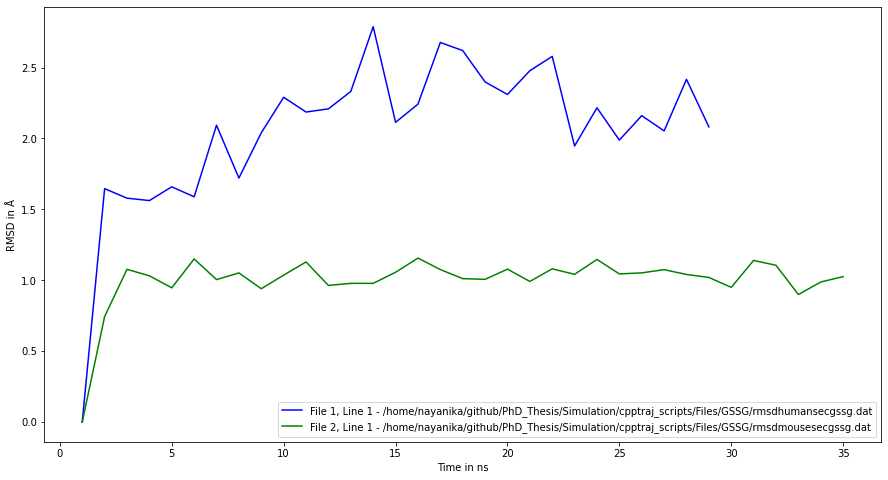

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.patches as patches

# Specify the pattern for .dat files
file_pattern = '/home/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsd*.dat'

# Get a list of all .dat files that match the pattern
file_list = glob.glob(file_pattern)

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Define a list of RGB tuples for colors
#colors = ['red','blue', 'green','purple']
colors = ['blue', 'green']

# Plot each file with a different color
for file_index, (file_path, color) in enumerate(zip(file_list, colors), start=1):
    # Load data from the file using numpy
    data = np.loadtxt(file_path)

    # Assuming the first column is x-axis data
    x_values = data[:, 0]

    # Assuming the remaining columns are y-axis data for different lines
    y_values_list = data[:, 1:]

    # Plot each line with a different color
    for line_index, y_values in enumerate(y_values_list.T, start=1):
        ax.plot(x_values, y_values, label=f'File {file_index}, Line {line_index} - {file_path}', color=color)

# Add labels
ax.set_xlabel('Time in ns')
ax.set_ylabel('RMSD in Å')

# Add legend with custom location
ax.legend(loc='lower right')

plt.show()

#make the python stript as follows - md steps vs rmsd and frames vs rmsd 

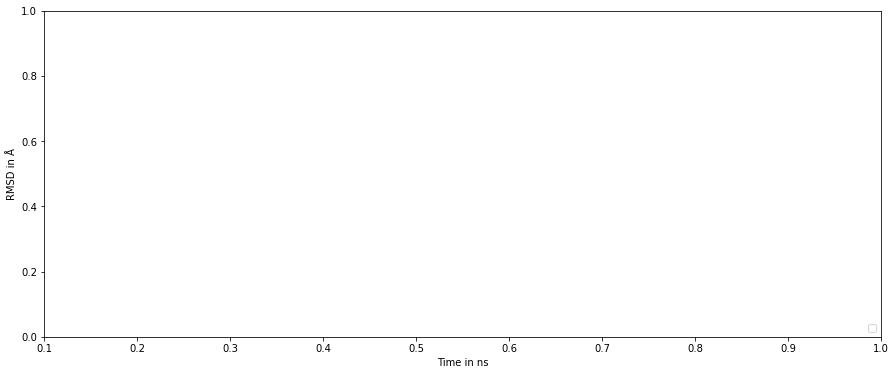

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import glob

def read_rmsd_file(file_path):
    with open(file_path, 'r') as file:
        data = file.read()

    # Load data into a DataFrame
    df = pd.read_csv(StringIO(data), delim_whitespace=True)
    return df

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 6))

# Use glob to get a list of files matching the pattern
file_pattern = '/home/nayanika/github/Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsdhumansecgssg.dat'
file_paths = glob.glob(file_pattern)

# Define a list of RGB tuples for colors
colors = ['purple', 'blue']

lines = []  # Store Line2D objects for legend

for file_path, color in zip(file_paths, colors):
    # Extract file name from the path
    file_name = file_path.split('/')[-1].split('.')[0]
    
    # Read data and plot
    df = read_rmsd_file(file_path)
    
    # Check if 'RMSD_00002' column exists in the dataframe
    if 'RMSD_00002' in df.columns:
        x_values = df['#Frame'].round(3) * 0.001 + 0.10  # Adjusted for 0.001 nanoseconds and starting at 0.10 ns
        y_values = df['RMSD_00002']
        
        # Check for missing values in y_values
        if y_values.notnull().any():
            line, = ax.plot(x_values, y_values, label=f'{file_name}', linestyle='-', color=color)
            lines.append(line)

# Add labels
ax.set_xlabel('Time in ns')
ax.set_ylabel('RMSD in Å')

# Set x-axis limit starting from 0.10
ax.set_xlim(0.10, ax.get_xlim()[1])

# Add legend with custom lines
ax.legend(lines, [line.get_label() for line in lines], loc='lower right')

plt.show()

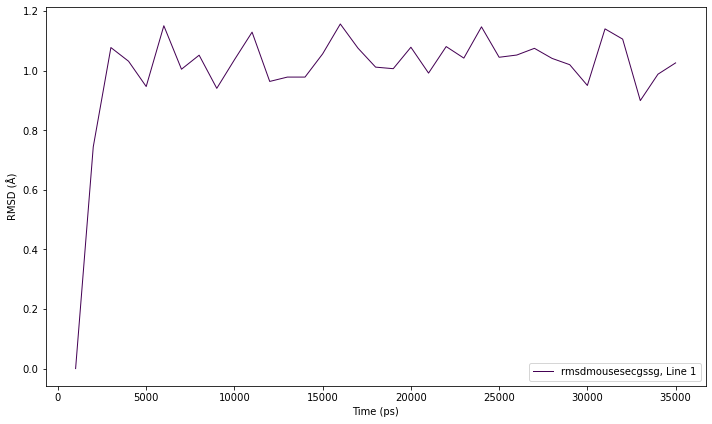

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib.colors import LinearSegmentedColormap

# Specify the pattern for .dat files
file_pattern = '/home/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsdmousesecgssg.dat'

# Get a list of all .dat files that match the pattern
file_list = glob.glob(file_pattern)

# Create a gradient colormap
cmap = plt.get_cmap('viridis')

# Normalize colormap to the number of files
norm = plt.Normalize(0, len(file_list))

# Lists to store handles and labels for legend
handles = []
labels = []

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each file with a gradient color
for file_index, file_path in enumerate(file_list, start=1):
    # Load data from the file using numpy
    data = np.loadtxt(file_path)

    # Extract file name from the path
    file_name = file_path.split('/')[-1].split('.')[0]

    # Assuming the first column is x-axis data
    x_values_ns = data[:, 0]
    
    # Convert x-axis values to picoseconds
    x_values_ps = x_values_ns * 1000

    # Assuming the remaining columns are y-axis data for different lines
    y_values_list = data[:, 1:]

    # Plot each line with a gradient color
    for line_index, y_values in enumerate(y_values_list.T, start=1):
        line_label = f'{file_name}, Line {line_index}'
        color = cmap(norm(file_index - 1))  # Use normalized index for gradient
        line, = ax.plot(x_values_ps, y_values, label=line_label, color=color, linestyle='-', linewidth=1)
        handles.append(line)
        labels.append(line_label)

# Add labels
ax.set_xlabel('Time (ps)')
ax.set_ylabel('RMSD (Å)')

# Add legend with custom location
ax.legend(handles=handles, labels=labels, loc='lower right')

# Set a tight layout
plt.tight_layout()

plt.show()

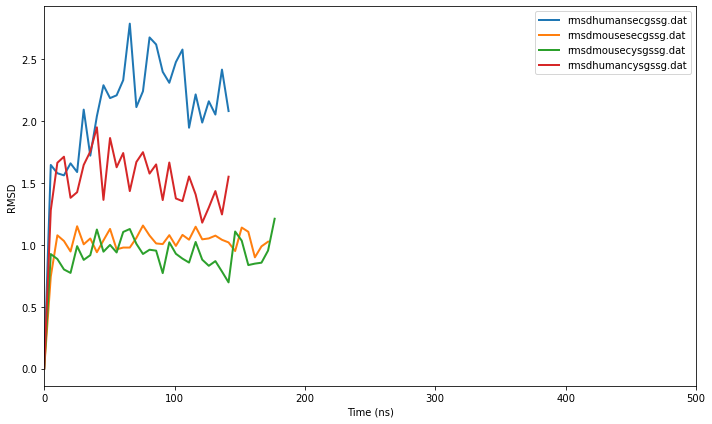

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Simulation parameters
total_simulation_time_ns = 500
total_frames = 100  # Assuming 100 frames for demonstration

# Convert frames to picoseconds
time_in_picoseconds = np.linspace(0, total_simulation_time_ns, total_frames)

# Directory containing RMSD files
directory_path = '/home/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/'

# List to store data for each file
file_data = []

# Iterate through files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.dat') and filename.startswith('rmsd'):  # Only read files with '.dat' suffix and start with 'rmsd'
        file_path = os.path.join(directory_path, filename)
        rmsd_values = []

        with open(file_path, 'r') as file:
            for line in file:
                if not line.startswith('#'):
                    try:
                        rmsd_values.append(float(line.strip().split()[1]))  # Assuming the RMSD values are in the second column
                    except ValueError:
                        print(f"Skipping line in {filename}: {line}")

        # Ensure the lengths match by using the minimum length
        min_length = min(len(time_in_picoseconds), len(rmsd_values))
        # Append data to the file_data list
        file_data.append({'filename': filename, 'time_in_picoseconds': time_in_picoseconds[:min_length], 'rmsd_values': rmsd_values[:min_length]})

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot RMSD for each file and add legend
for data in file_data:
    ax.plot(data['time_in_picoseconds'], data['rmsd_values'], label=data['filename'], linestyle='-', linewidth=2)

# Add labels
ax.set_xlabel('Time (ns)')
ax.set_ylabel('RMSD')

# Set x-axis limit to 500 ns
ax.set_xlim(0, total_simulation_time_ns)

# Add legend
ax.legend()

# Set a tight layout
plt.tight_layout()

plt.show()

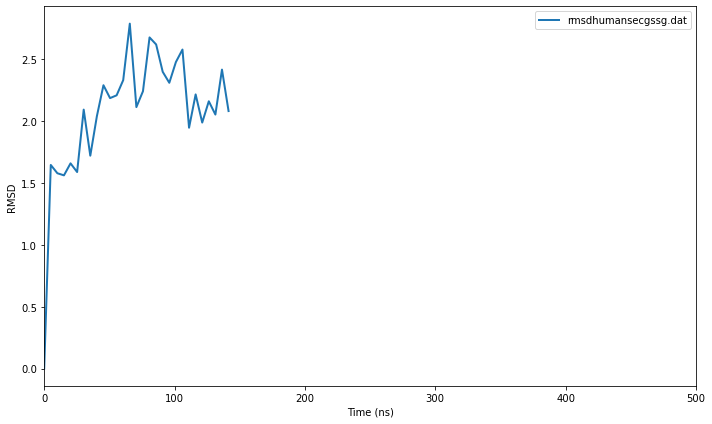

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Simulation parameters
total_simulation_time_ns = 500
total_frames = 100  # Assuming 100 frames for demonstration

# Convert frames to picoseconds
time_in_picoseconds = np.linspace(0, total_simulation_time_ns, total_frames)

# Path to the RMSD file
file_path = '/home/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/rmsdhumansecgssg.dat'

# List to store data for the file
file_data = []

# Read data from the file
rmsd_values = []
with open(file_path, 'r') as file:
    for line in file:
        if not line.startswith('#'):
            try:
                rmsd_values.append(float(line.strip().split()[1]))  # Assuming the RMSD values are in the second column
            except ValueError:
                print(f"Skipping line in {file_path}: {line}")

# Ensure the lengths match by using the minimum length
min_length = min(len(time_in_picoseconds), len(rmsd_values))
# Append data to the file_data list
file_data.append({'filename': os.path.basename(file_path), 'time_in_picoseconds': time_in_picoseconds[:min_length], 'rmsd_values': rmsd_values[:min_length]})

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot RMSD for the file
for data in file_data:
    ax.plot(data['time_in_picoseconds'], data['rmsd_values'], label=data['filename'], linestyle='-', linewidth=2)

# Add labels
ax.set_xlabel('Time (ns)')
ax.set_ylabel('RMSD')

# Set x-axis limit to 500 ns
ax.set_xlim(0, total_simulation_time_ns)

# Add legend
ax.legend()

# Set a tight layout
plt.tight_layout()

plt.show()

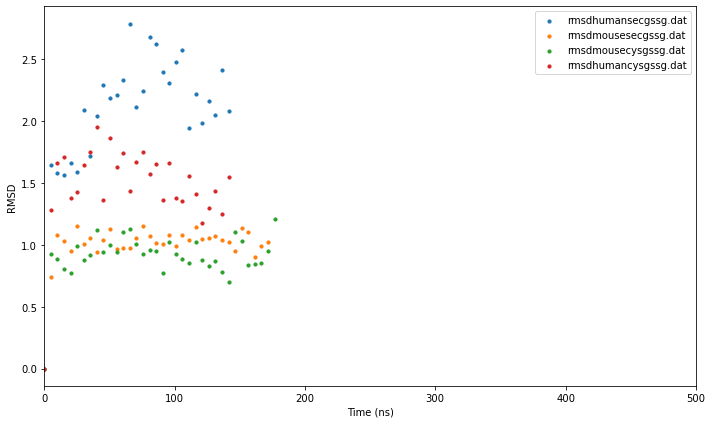

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Simulation parameters
total_simulation_time_ns = 500
total_frames = 100  # Assuming 100 frames for demonstration

# Convert frames to picoseconds
time_in_picoseconds = np.linspace(0, total_simulation_time_ns, total_frames)

# Directory containing RMSD files
directory_path = '/home/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/'

# List to store data for each file
file_data = []

# Iterate through files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.dat') and filename.startswith('rmsd'):  # Only read files with '.dat' suffix and start with 'rmsd'
        file_path = os.path.join(directory_path, filename)
        rmsd_values = []

        with open(file_path, 'r') as file:
            for line in file:
                if not line.startswith('#'):
                    try:
                        rmsd_values.append(float(line.strip().split()[1]))  # Assuming the RMSD values are in the second column
                    except ValueError:
                        print(f"Skipping line in {filename}: {line}")

        # Ensure the lengths match by using the minimum length
        min_length = min(len(time_in_picoseconds), len(rmsd_values))
        # Append data to the file_data list
        file_data.append({'filename': filename, 'time_in_picoseconds': time_in_picoseconds[:min_length], 'rmsd_values': rmsd_values[:min_length]})

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot scatter plot for RMSD for each file
for data in file_data:
    ax.scatter(data['time_in_picoseconds'], data['rmsd_values'], label=data['filename'], s=10)  # s is the marker size

# Add labels
ax.set_xlabel('Time (ns)')
ax.set_ylabel('RMSD')

# Set x-axis limit to 500 ns
ax.set_xlim(0, total_simulation_time_ns)

# Add legend
ax.legend()

# Set a tight layout
plt.tight_layout()

plt.show()

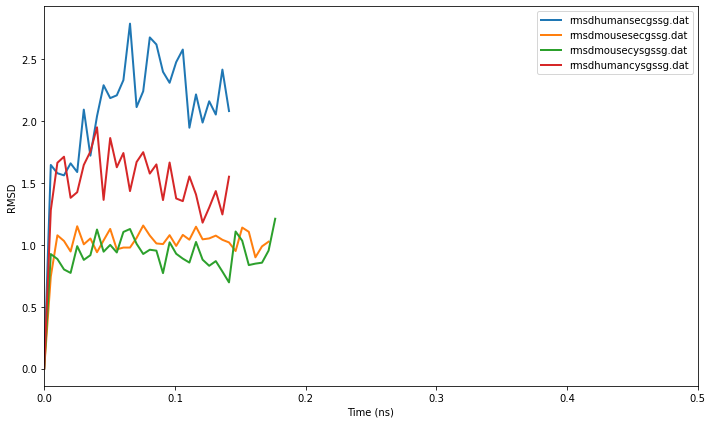

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Simulation parameters
total_simulation_time_ns = 500
total_frames = 100  # Assuming 100 frames for demonstration

# Convert frames to picoseconds
time_in_picoseconds = np.linspace(0, total_simulation_time_ns, total_frames)

# Directory containing RMSD files
directory_path = '/home/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/'

# List to store data for each file
file_data = []

# Iterate through files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.dat') and filename.startswith('rmsd'):  # Only read files with '.dat' suffix and start with 'rmsd'
        file_path = os.path.join(directory_path, filename)
        rmsd_values = []

        with open(file_path, 'r') as file:
            for line in file:
                if not line.startswith('#'):
                    try:
                        rmsd_values.append(float(line.strip().split()[1]))  # Assuming the RMSD values are in the second column
                    except ValueError:
                        print(f"Skipping line in {filename}: {line}")

        # Ensure the lengths match by using the minimum length
        min_length = min(len(time_in_picoseconds), len(rmsd_values))
        # Append data to the file_data list
        file_data.append({'filename': filename, 'time_in_picoseconds': time_in_picoseconds[:min_length], 'rmsd_values': rmsd_values[:min_length]})

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot RMSD for each file and add legend
for data in file_data:
    # Adjust the x-axis scale to 0.001 nanoseconds
    ax.plot(data['time_in_picoseconds'] / 1000, data['rmsd_values'], label=data['filename'], linestyle='-', linewidth=2)

# Add labels
ax.set_xlabel('Time (ns)')
ax.set_ylabel('RMSD')

# Set x-axis limit to 500 ns
ax.set_xlim(0, total_simulation_time_ns / 1000)

# Add legend
ax.legend()

# Set a tight layout
plt.tight_layout()

plt.show()